In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sys

%matplotlib inline

In [3]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Python Version:", sys.version)


Pandas version: 0.22.0
Numpy version: 1.14.0
Python Version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### DF Note: By end of document, changes to df include... Striped 0

In [4]:
# Read NYC turntable for the month of march, from march 3rd to march 30th (4weeks)
df = pd.read_csv("NYCT180310.csv")
#path =r'/Users/mayamidzik/metis/01-benson' # use your path
#all_files = glob.glob(os.path.join(path, "NYCT*.csv"))
#all_files
#df = pd.concat((pd.read_csv(f) for f in all_files))

#read NYC turntable for the week of march 10th
#df = pd.read_csv("NYCT180310.csv")

In [5]:
#remove extra spaces in strings of columns
df.columns = df.columns.str.strip()
#df.head(10)

# 1. CLEANING: Ridding the data of weeks with rogue zeros. (new dataframe "df_r")
# 2. CONSOLIDATING: Setting identifer for individual stations (new column "ts")

### NEW DATA FRAME: df_r is data frame with 0s removed, TS (turnstyle) added, DTime (date time), Entries, Exits

In [6]:
#remove reset entries and designate this new dataframe as df_r
df_r = df[df.ENTRIES != 0]
len(df_r[df_r["ENTRIES"] == 0])
print("removed", len(df) - len(df_r), "entries")

removed 3239 entries


In [7]:
# converting to datetime 
#DTime = df_r.dt.time(df.DATE, " ", df.TIME)
#df_r.insert(loc=8, column = 'DTime', value=DTime)
#df_r.head(10)
#date_index
#series.resample('Columnname').sum()

date_time = pd.to_datetime(df_r.DATE + " " + df_r.TIME, format= "%m/%d/%Y %H:%M:%S")
df_r.insert(loc=8, column= "DATE_TIME", value=date_time)
time = df_r.DATE_TIME.dt.time
df_r.insert(loc=9, column = "TIME_TIME", value=time)


In [8]:
weekday = df_r['DATE_TIME'].dt.dayofweek
df_r.insert(loc=10, column = "Weekday", value=weekday)

In [9]:
df_r.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,REGULAR,6536723,2213669


In [10]:
#create a unique string for each turnstile and add it as the 4th index
ts = df_r['C/A']+df_r.UNIT+df_r.SCP+df_r.STATION+df_r.LINENAME
df_r.insert(loc=4, column='TS', value=ts)

df_r.head()

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,REGULAR,6536326,2213531


### NEW DATA FRAME: grpb is grouped by TS and DATE

In [11]:
grpb = df_r.groupby(['TS' , 'DATE'])

# Creating a column for time differences between exits and entrances

In [12]:
difference = grpb['ENTRIES'].diff()
#df_r['Entries_diff'] = grpb['ENTRIES'].diff()
df_r.insert(loc=12, column='Entries_diff', value=difference)


In [13]:
difference2 = grpb['EXITS'].diff()
#df_r['Exits_diff'] = grpb['EXITS'].diff()
df_r.insert(loc=13, column='Exits_diff', value=difference2)


In [14]:
df_r.head(10)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,NaN,NaN,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,11.0,11.0,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,52.0,80.0,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,183.0,45.0,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,278.0,50.0,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,161.0,31.0,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,NaN,NaN,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,8.0,9.0,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,50.0,47.0,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,147.0,43.0,REGULAR,6536723,2213669


# Exploring weird results (may or may not need to handle later, depending, on which stations we select. )

In [15]:
df_r['Entries_diff'].isnull().sum()

32419

In [16]:
df_r[df_r.Entries_diff < 0]

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
1429,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,-49.0,-116.0,REGULAR,886115215,491692961
1430,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,-252.0,-584.0,REGULAR,886114963,491692377
1431,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,-441.0,-663.0,REGULAR,886114522,491691714
1432,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,-647.0,-666.0,REGULAR,886113875,491691048
1433,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,-513.0,-424.0,REGULAR,886113362,491690624
1435,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,-56.0,-75.0,REGULAR,886113005,491690478
1436,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,-209.0,-417.0,REGULAR,886112796,491690061
1437,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,-377.0,-615.0,REGULAR,886112419,491689446
1438,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/04/2018,19:00:00,2018-03-04 19:00:00,19:00:00,6,-503.0,-559.0,REGULAR,886111916,491688887
1439,A011,R080,01-00-00,57 ST-7 AV,A011R08001-00-0057 ST-7 AVNQRW,NQRW,BMT,03/04/2018,23:00:00,2018-03-04 23:00:00,23:00:00,6,-383.0,-185.0,REGULAR,886111533,491688702


In [17]:
df_r[df_r["Entries_diff"] < 0].groupby(["STATION"]).count()

,C/A,UNIT,SCP,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
STATION,,,,,,,,,,,,,,,,
104 ST,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
125 ST,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
14 ST,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
161/YANKEE STAD,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
174 ST,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
23 ST,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
3 AV-149 ST,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
34 ST-HERALD SQ,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
42 ST-PORT AUTH,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104


In [18]:
len(df_r[df_r["Entries_diff"] < 0].groupby(["STATION"]).count())

39

In [19]:
df_r.reset_index()

,index,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,NaN,NaN,REGULAR,6535802,2213345
1,1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,11.0,11.0,REGULAR,6535813,2213356
2,2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,52.0,80.0,REGULAR,6535865,2213436
3,3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,183.0,45.0,REGULAR,6536048,2213481
4,4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,278.0,50.0,REGULAR,6536326,2213531
5,5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,161.0,31.0,REGULAR,6536487,2213562
6,6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,NaN,NaN,REGULAR,6536518,2213570
7,7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,8.0,9.0,REGULAR,6536526,2213579
8,8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,50.0,47.0,REGULAR,6536576,2213626
9,9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,147.0,43.0,REGULAR,6536723,2213669


# Grouping by station, linename, and time to find average ridership entry for each time of day.

### Entries

In [27]:
#Entries_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME'], as_index = False)['Entries_diff'].apply(np.mean)
Entries_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME'], as_index = False)['Entries_diff'].agg("sum")
#Entries_diff = Entries_diff["Entries_diff"]
#df_r.reset_index()
print(Entries_diff)

#df_r.insert(loc = 13, column='Daily_Entry', value=Entries_diff)

#df_r.head(10)
#df['e'] = df[['a','b','d']].map(sum)
#df_r
df_r

               STATION LINENAME TIME_TIME  Entries_diff
0                 1 AV        L  03:00:00           0.0
1                 1 AV        L  07:00:00        3403.0
2                 1 AV        L  11:00:00       29207.0
3                 1 AV        L  15:00:00       26637.0
4                 1 AV        L  19:00:00       44689.0
5                 1 AV        L  23:00:00       27418.0
6               103 ST        1  00:00:00           0.0
7               103 ST        1  04:00:00         563.0
8               103 ST        1  08:00:00        7967.0
9               103 ST        1  12:00:00       24699.0
10              103 ST        1  16:00:00       17625.0
11              103 ST        1  20:00:00       19162.0
12              103 ST        6  00:00:00           0.0
13              103 ST        6  04:00:00         423.0
14              103 ST        6  08:00:00        9473.0
15              103 ST        6  12:00:00       20637.0
16              103 ST        6  16:00:00       

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Daily_Entry,Daily_Exit,Exits_diff,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,NaN,0.0,0.0,NaN,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,11.0,3403.0,7754.0,11.0,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,52.0,29207.0,39426.0,80.0,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,183.0,26637.0,28333.0,45.0,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,278.0,44689.0,41721.0,50.0,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,161.0,27418.0,30557.0,31.0,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,NaN,0.0,0.0,NaN,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,8.0,563.0,651.0,9.0,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,50.0,7967.0,2074.0,47.0,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,147.0,24699.0,6581.0,43.0,REGULAR,6536723,2213669


### Exits

In [26]:
Exits_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME'], as_index = False)['Exits_diff'].agg("sum")
#Exits_diff = Exits_diff["Exits_diff"]

print(Exits_diff)
#df_r.insert(loc = 14, column='Daily_Exit', value=Exits_diff)

#df_r

               STATION LINENAME TIME_TIME  Exits_diff
0                 1 AV        L  03:00:00         0.0
1                 1 AV        L  07:00:00      7754.0
2                 1 AV        L  11:00:00     39426.0
3                 1 AV        L  15:00:00     28333.0
4                 1 AV        L  19:00:00     41721.0
5                 1 AV        L  23:00:00     30557.0
6               103 ST        1  00:00:00         0.0
7               103 ST        1  04:00:00       651.0
8               103 ST        1  08:00:00      2074.0
9               103 ST        1  12:00:00      6581.0
10              103 ST        1  16:00:00      8445.0
11              103 ST        1  20:00:00     13438.0
12              103 ST        6  00:00:00         0.0
13              103 ST        6  04:00:00      1209.0
14              103 ST        6  08:00:00      8419.0
15              103 ST        6  12:00:00     15839.0
16              103 ST        6  16:00:00     16444.0
17              103 ST      

In [22]:
#Entries_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME', ])['Entries_diff'].apply(np.sum)
#df_r.reset_index()
#print(Entries_diff)
#df_r.insert(loc = 13, column='Daily_Entry', value=Entries_diff)

In [ ]:
#difference = grpb['ENTRIES'].diff()
#df_STATIONS = (column='Entries_diff', value=difference)

#df.groupby('l')['v'].apply(pd.Series.sum,skipna=False) # for series, or


### NEW DATA FRAME: df_FourNine is the data frame for a single turnstyle, a single day for 4th ave, 9th street.
Goal: Group by station, and sum each of the arguments under the same datetime. 
<br /> Super Goal: Group by station, sum each over the same date time, and average Entry/Exit data over the whole week. 

In [55]:
df_r['STATION'].unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [57]:
df_r[df_r['STATION'] == '23 ST'].sample(50)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Daily_Entry,Daily_Exit,Exits_diff,DESC,ENTRIES,EXITS
53530,N076,R111,00-00-00,23 ST,N076R11100-00-0023 STCE,CE,IND,03/06/2018,11:00:00,2018-03-06 11:00:00,11:00:00,1,702.0,NaN,NaN,355.0,REGULAR,3917433,1448459
96852,N508,R453,00-00-04,23 ST,N508R45300-00-0423 STFM,FM,IND,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,270.0,NaN,NaN,341.0,REGULAR,9093199,13274397
97083,N509,R203,00-00-04,23 ST,N509R20300-00-0423 STFM,FM,IND,03/06/2018,15:00:00,2018-03-06 15:00:00,15:00:00,1,701.0,NaN,NaN,595.0,REGULAR,6974367,5972738
150421,R227,R131,00-00-01,23 ST,R227R13100-00-0123 ST6,6,IRT,03/06/2018,08:00:00,2018-03-06 08:00:00,08:00:00,1,72.0,NaN,NaN,116.0,REGULAR,15396854,9814836
150504,R227,R131,00-00-03,23 ST,R227R13100-00-0323 ST6,6,IRT,03/06/2018,04:00:00,2018-03-06 04:00:00,04:00:00,1,14.0,NaN,NaN,2.0,REGULAR,4445078,2879684
53957,N077,R111,02-06-02,23 ST,N077R11102-06-0223 STCE,CE,IND,03/07/2018,15:00:00,2018-03-07 15:00:00,15:00:00,2,69.0,NaN,NaN,44.0,REGULAR,4322703,3018652
96815,N508,R453,00-00-03,23 ST,N508R45300-00-0323 STFM,FM,IND,03/05/2018,11:00:00,2018-03-05 11:00:00,11:00:00,0,171.0,NaN,NaN,917.0,REGULAR,338525542,321573697
150121,R226,R131,02-06-00,23 ST,R226R13102-06-0023 ST6,6,IRT,03/05/2018,08:00:00,2018-03-05 08:00:00,08:00:00,0,0.0,NaN,NaN,0.0,REGULAR,589951,0
4093,A030,R083,01-00-02,23 ST,A030R08301-00-0223 STNRW,NRW,BMT,03/07/2018,23:00:00,2018-03-07 23:00:00,23:00:00,2,92.0,46.0,3.0,9.0,REGULAR,4678943,2218164
53455,N075,R111,01-06-00,23 ST,N075R11101-06-0023 STCE,CE,IND,03/07/2018,23:00:00,2018-03-07 23:00:00,23:00:00,2,134.0,NaN,NaN,5.0,REGULAR,103226233,121701


In [ ]:
#df_r.loc[df_r['STATION'].isin[('59 ST')]]
#df_r.loc['59 ST','03/03/2018'],['Entries_diff']

df_FourNine = df_r[(df_r['TS'] == 'C012R25801-00-004AV-9 STDFGMNR') & (df_r['DATE'] == '03/06/2018')] 
df_FourNine.head(10)

# Plotting sample 4th ave, 9th street data as barchart

In [ ]:
#x = df_r[df_r['STATION'].isin[('RIT-ROOSEVELT')]]
#y = ['Entries_diff']
#x = df_FourNine['TIME'](bar_lefts, bar_heights, width=1.0, facecolor='Purple', edgecolor='Purple')

times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

X = np.arange(5)
plt.bar(times, Entries, color = 'purple', width = 1)
plt.bar(times, Exits, color = 'green', width = 1)
times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

#width = 0.45
#plt.PrePlot(2)
#plt.bar(y, align='left', width = width)
#plt.bar(y2, align='right', width = width)
#plt.Show(xlabel = 'Time of Day' , ylabel = 'Frequency')


# Plotting Sample 4th ave, 9th street Data as line

In [ ]:
# red dashes, blue squares and green triangles
plt.plot(times, Entries, 'p--', times, Exits, 'g--')

# NEW DATA FRAME: df_Columbus

In [ ]:
df_Columbus = df_r[(df_r['STATION'] == '59 ST COLUMBUS') & (df_r['DATE'] == '03/06/2018')] 
df_Columbus.head(10)

### Plotting 59th street Columbus Circle

In [ ]:
times2 = df_Columbus['TIME']
Entries2 = df_Columbus['Entries_diff']
Exits2 = df_Columbus['Exits_diff']

X = np.arange(5)
plt.bar(times2, Entries2, color = 'purple', width = 1)
plt.bar(times2, Exits2, color = 'green', width = 1)
times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

In [ ]:
# red dashes, blue squares and green triangles
plt.plot(times2, Entries2, 'p--', times2, Exits2, 'g--')

# NEW DATA FRAME: Dekalb

In [33]:
df_Dekalb = df_r[(df_r['STATION'] == 'DEKALB AV') & (df_r['DATE'] == '03/08/2018')] 
df_Dekalb.head(10)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Daily_Entry,Daily_Exit,Exits_diff,DESC,ENTRIES,EXITS
20097,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,03:00:00,2018-03-08 03:00:00,03:00:00,3,NaN,NaN,NaN,NaN,REGULAR,6202232,7736410
20098,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,07:00:00,2018-03-08 07:00:00,07:00:00,3,46.0,NaN,NaN,73.0,REGULAR,6202278,7736483
20099,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,11:00:00,2018-03-08 11:00:00,11:00:00,3,325.0,NaN,NaN,585.0,REGULAR,6202603,7737068
20100,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,15:00:00,2018-03-08 15:00:00,15:00:00,3,317.0,NaN,NaN,349.0,REGULAR,6202920,7737417
20101,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,19:00:00,2018-03-08 19:00:00,19:00:00,3,596.0,NaN,NaN,587.0,REGULAR,6203516,7738004
20102,C008,R099,00-00-00,DEKALB AV,C008R09900-00-00DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,23:00:00,2018-03-08 23:00:00,23:00:00,3,272.0,NaN,NaN,477.0,REGULAR,6203788,7738481
20141,C008,R099,00-00-01,DEKALB AV,C008R09900-00-01DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,03:00:00,2018-03-08 03:00:00,03:00:00,3,NaN,NaN,NaN,NaN,REGULAR,1409550246,1141075700
20142,C008,R099,00-00-01,DEKALB AV,C008R09900-00-01DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,07:00:00,2018-03-08 07:00:00,07:00:00,3,29.0,NaN,NaN,30.0,REGULAR,1409550275,1141075730
20143,C008,R099,00-00-01,DEKALB AV,C008R09900-00-01DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,11:00:00,2018-03-08 11:00:00,11:00:00,3,262.0,NaN,NaN,359.0,REGULAR,1409550537,1141076089
20144,C008,R099,00-00-01,DEKALB AV,C008R09900-00-01DEKALB AVBDNQR,BDNQR,BMT,03/08/2018,15:00:00,2018-03-08 15:00:00,15:00:00,3,233.0,NaN,NaN,162.0,REGULAR,1409550770,1141076251


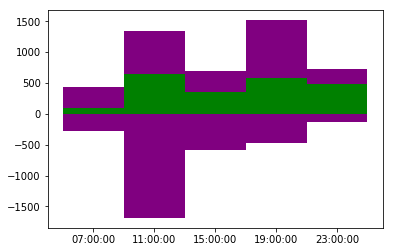

In [34]:
times2 = df_Dekalb['TIME']
Entries2 = df_Dekalb['Entries_diff']
Exits2 = df_Dekalb['Exits_diff']

X = np.arange(5)
plt.bar(times2, Entries2, color = 'purple', width = 1)
plt.bar(times2, Exits2, color = 'green', width = 1)
times = df_Dekalb['TIME']
Entries = df_Dekalb['Entries_diff']
Exits = df_Dekalb['Exits_diff']

# OLD. DAY OF WEEK WORK

In [ ]:
# groupby TS and DATE, then create a new column "dif" for max - min
# gb = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.agg(["min", "max"])
# gb2 = df_r.groupby(["TS", "DATE"]).ENTRIES.agg(["min", "max"])
# gb["dif"] = gb["max"] - gb["min"]
# gb2["dif"] = gb2["max"] - gb2["min"]


In [ ]:
# gb.head(10)

In [ ]:

#plt.barh(gb.index.levels[1],gb.dif)
# gb.dif.describe()
#sns.boxplot(gb.dif)
#odd = len(gb[gb.dif > 10000])
#print("there are", odd, "days that had more than 10,000 entries (what I may consider odd/outliers)")


In [ ]:
# Take a look at the outliers >10000
gb[gb.dif > 10000]

In [ ]:
# gb_r is gb with the obviousresets removed
# gb_r = gb[gb.dif < 20000]
# Show boxplot 
# sns.boxplot(gb_r.dif);

In [ ]:
# plt.barh(gb_r[:7].index.levels[4], gb_r[:7]["dif"])
#gb_r.head

In [ ]:
# gb_r.reset_index().head()

In [ ]:
# gb_r.groupby(["STATION"]).agg("sum").sort_values("dif", ascending=False)

In [ ]:
##Disregard this cell. Just for testing

# #df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).count()
# gb3 = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME","DATE"]).ENTRIES.agg(["min", "max"])
# gb3#[gb3["STATION"] == "23 ST"]